In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# Load the dataset
data_path = '../src/data/cleanedTelecomUsersData.csv'
df = pd.read_csv(data_path)

#### Aggregate, per customer, the following information: Average TCP retransmission, Average RTT,Handset type, and Average throughput

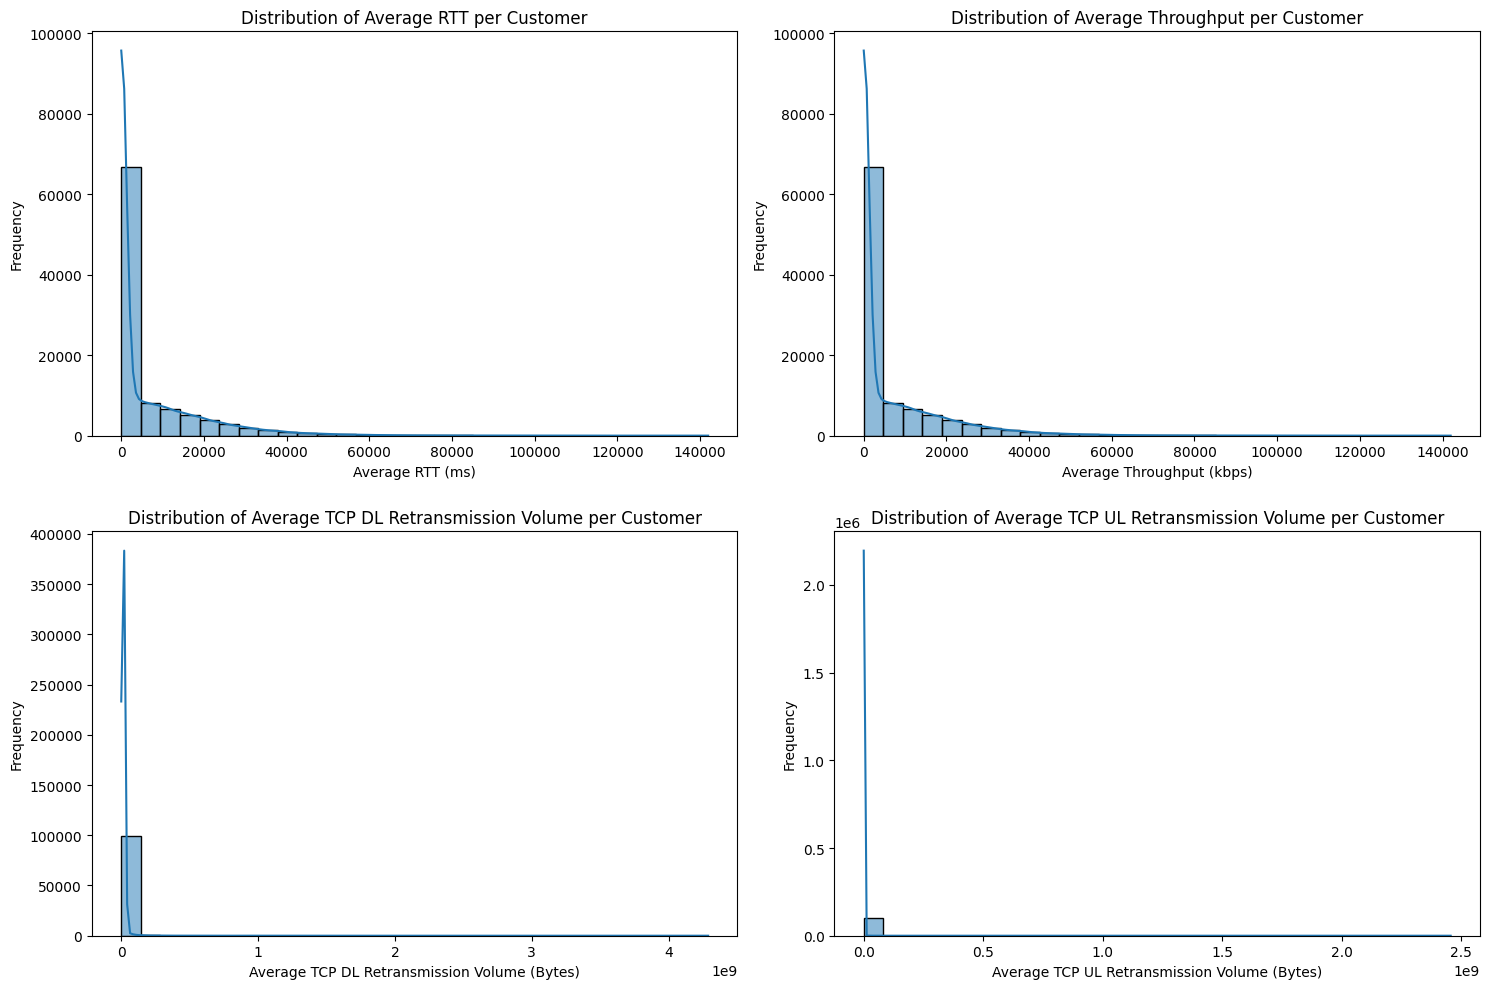

In [5]:
# Calculate average RTT and average throughput
df['Avg RTT'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2
df['Avg Throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2

# Aggregate information per customer
customer_agg = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT': 'mean',
    'Handset Type': 'first',
    'Avg Throughput': 'mean'
}).reset_index()

# Plotting the aggregated information in one figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(customer_agg['Avg RTT'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Average RTT per Customer')
axes[0, 0].set_xlabel('Average RTT (ms)')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(customer_agg['Avg Throughput'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Average Throughput per Customer')
axes[0, 1].set_xlabel('Average Throughput (kbps)')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(customer_agg['TCP DL Retrans. Vol (Bytes)'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Average TCP DL Retransmission Volume per Customer')
axes[1, 0].set_xlabel('Average TCP DL Retransmission Volume (Bytes)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(customer_agg['TCP UL Retrans. Vol (Bytes)'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Average TCP UL Retransmission Volume per Customer')
axes[1, 1].set_xlabel('Average TCP UL Retransmission Volume (Bytes)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Compute & list 10 of the top, bottom, and most frequent: TCP values in the dataset, RTT values in the dataset, and Throughput values in the dataset.

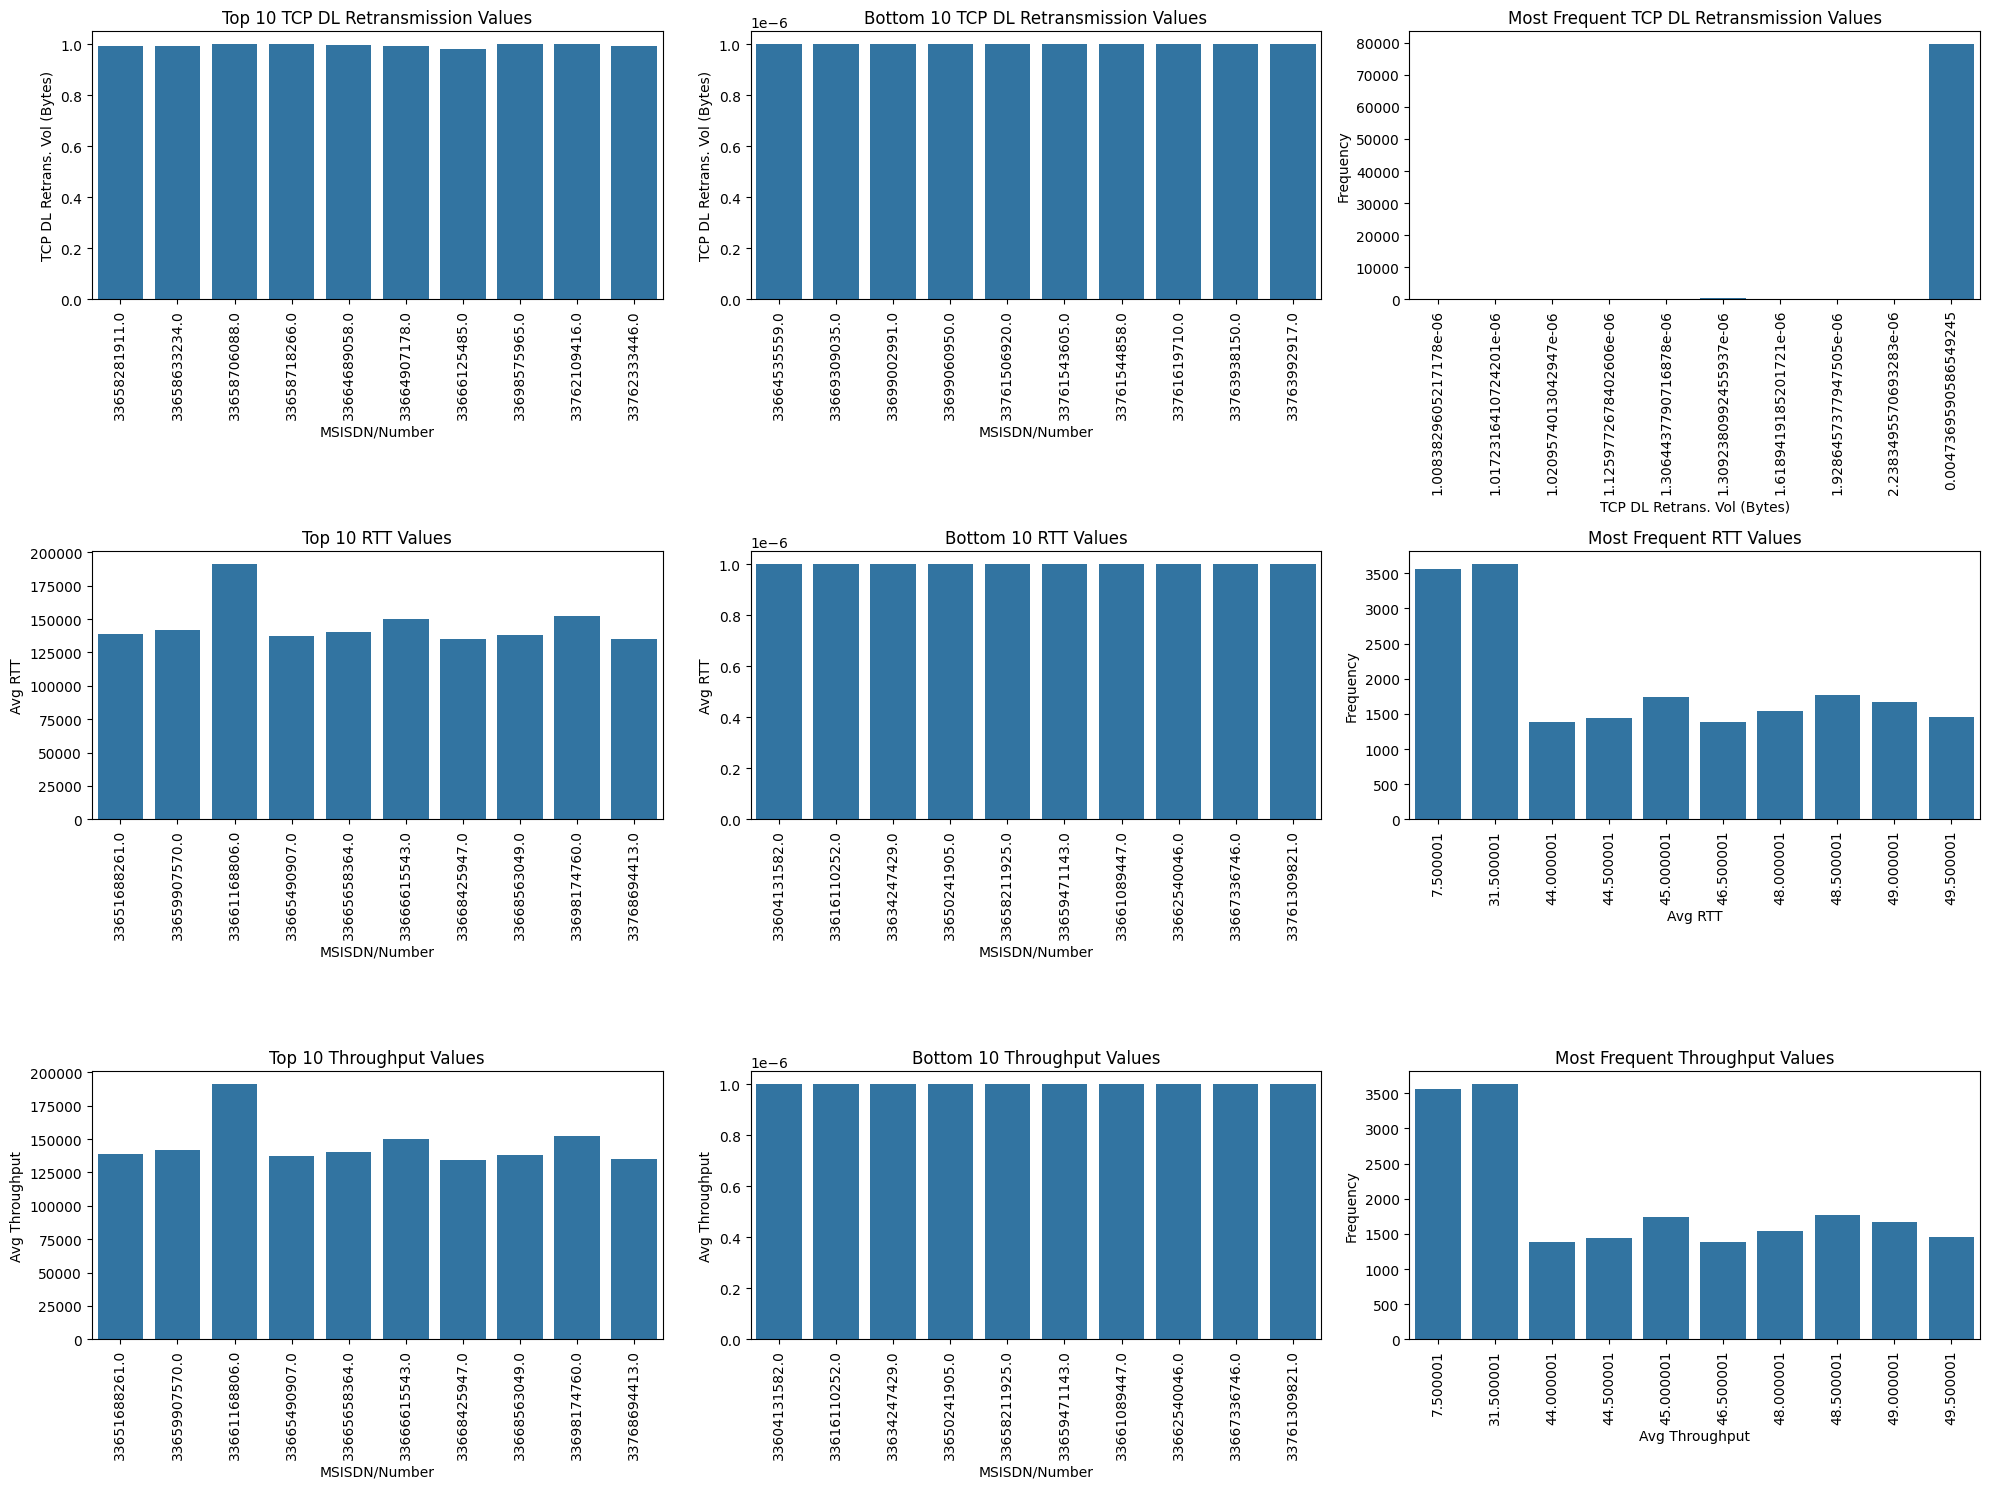

In [10]:
# Calculate average RTT and average throughput
df['Avg RTT'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2
df['Avg Throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2

# Add a small constant to avoid zero values
df['TCP DL Retrans. Vol (Bytes)'] += 1e-6
df['Avg RTT'] += 1e-6
df['Avg Throughput'] += 1e-6

# Top 10 TCP DL Retransmission values
top_10_tcp_dl = df.nlargest(10, 'TCP DL Retrans. Vol (Bytes)')

# Bottom 10 TCP DL Retransmission values
bottom_10_tcp_dl = df.nsmallest(10, 'TCP DL Retrans. Vol (Bytes)')

# Most frequent TCP DL Retransmission values
most_freq_tcp_dl = df['TCP DL Retrans. Vol (Bytes)'].value_counts().head(10)

# Top 10 RTT values
top_10_rtt = df.nlargest(10, 'Avg RTT')

# Bottom 10 RTT values
bottom_10_rtt = df.nsmallest(10, 'Avg RTT')

# Most frequent RTT values
most_freq_rtt = df['Avg RTT'].value_counts().head(10)

# Top 10 Throughput values
top_10_throughput = df.nlargest(10, 'Avg Throughput')

# Bottom 10 Throughput values
bottom_10_throughput = df.nsmallest(10, 'Avg Throughput')

# Most frequent Throughput values
most_freq_throughput = df['Avg Throughput'].value_counts().head(10)

# Plotting the top, bottom, and most frequent values in one figure with nine subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Top 10 TCP DL Retransmission values
sns.barplot(x=top_10_tcp_dl['MSISDN/Number'], y=top_10_tcp_dl['TCP DL Retrans. Vol (Bytes)'], ax=axes[0, 0])
axes[0, 0].set_title('Top 10 TCP DL Retransmission Values')
axes[0, 0].set_xlabel('MSISDN/Number')
axes[0, 0].set_ylabel('TCP DL Retrans. Vol (Bytes)')
axes[0, 0].tick_params(axis='x', rotation=90)

# Bottom 10 TCP DL Retransmission values
sns.barplot(x=bottom_10_tcp_dl['MSISDN/Number'], y=bottom_10_tcp_dl['TCP DL Retrans. Vol (Bytes)'], ax=axes[0, 1])
axes[0, 1].set_title('Bottom 10 TCP DL Retransmission Values')
axes[0, 1].set_xlabel('MSISDN/Number')
axes[0, 1].set_ylabel('TCP DL Retrans. Vol (Bytes)')
axes[0, 1].tick_params(axis='x', rotation=90)

# Most frequent TCP DL Retransmission values
sns.barplot(x=most_freq_tcp_dl.index, y=most_freq_tcp_dl.values, ax=axes[0, 2])
axes[0, 2].set_title('Most Frequent TCP DL Retransmission Values')
axes[0, 2].set_xlabel('TCP DL Retrans. Vol (Bytes)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].tick_params(axis='x', rotation=90)

# Top 10 RTT values
sns.barplot(x=top_10_rtt['MSISDN/Number'], y=top_10_rtt['Avg RTT'], ax=axes[1, 0])
axes[1, 0].set_title('Top 10 RTT Values')
axes[1, 0].set_xlabel('MSISDN/Number')
axes[1, 0].set_ylabel('Avg RTT')
axes[1, 0].tick_params(axis='x', rotation=90)

# Bottom 10 RTT values
sns.barplot(x=bottom_10_rtt['MSISDN/Number'], y=bottom_10_rtt['Avg RTT'], ax=axes[1, 1])
axes[1, 1].set_title('Bottom 10 RTT Values')
axes[1, 1].set_xlabel('MSISDN/Number')
axes[1, 1].set_ylabel('Avg RTT')
axes[1, 1].tick_params(axis='x', rotation=90)

# Most frequent RTT values
sns.barplot(x=most_freq_rtt.index, y=most_freq_rtt.values, ax=axes[1, 2])
axes[1, 2].set_title('Most Frequent RTT Values')
axes[1, 2].set_xlabel('Avg RTT')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].tick_params(axis='x', rotation=90)

# Top 10 Throughput values
sns.barplot(x=top_10_throughput['MSISDN/Number'], y=top_10_throughput['Avg Throughput'], ax=axes[2, 0])
axes[2, 0].set_title('Top 10 Throughput Values')
axes[2, 0].set_xlabel('MSISDN/Number')
axes[2, 0].set_ylabel('Avg Throughput')
axes[2, 0].tick_params(axis='x', rotation=90)

# Bottom 10 Throughput values
sns.barplot(x=bottom_10_throughput['MSISDN/Number'], y=bottom_10_throughput['Avg Throughput'], ax=axes[2, 1])
axes[2, 1].set_title('Bottom 10 Throughput Values')
axes[2, 1].set_xlabel('MSISDN/Number')
axes[2, 1].set_ylabel('Avg Throughput')
axes[2, 1].tick_params(axis='x', rotation=90)

# Most frequent Throughput values
sns.barplot(x=most_freq_throughput.index, y=most_freq_throughput.values, ax=axes[2, 2])
axes[2, 2].set_title('Most Frequent Throughput Values')
axes[2, 2].set_xlabel('Avg Throughput')
axes[2, 2].set_ylabel('Frequency')
axes[2, 2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Compute & report:The distribution of the average throughput per handset type and provide interpretation for your findings.The average TCP retransmission view per handset type and provide interpretation for your findings.

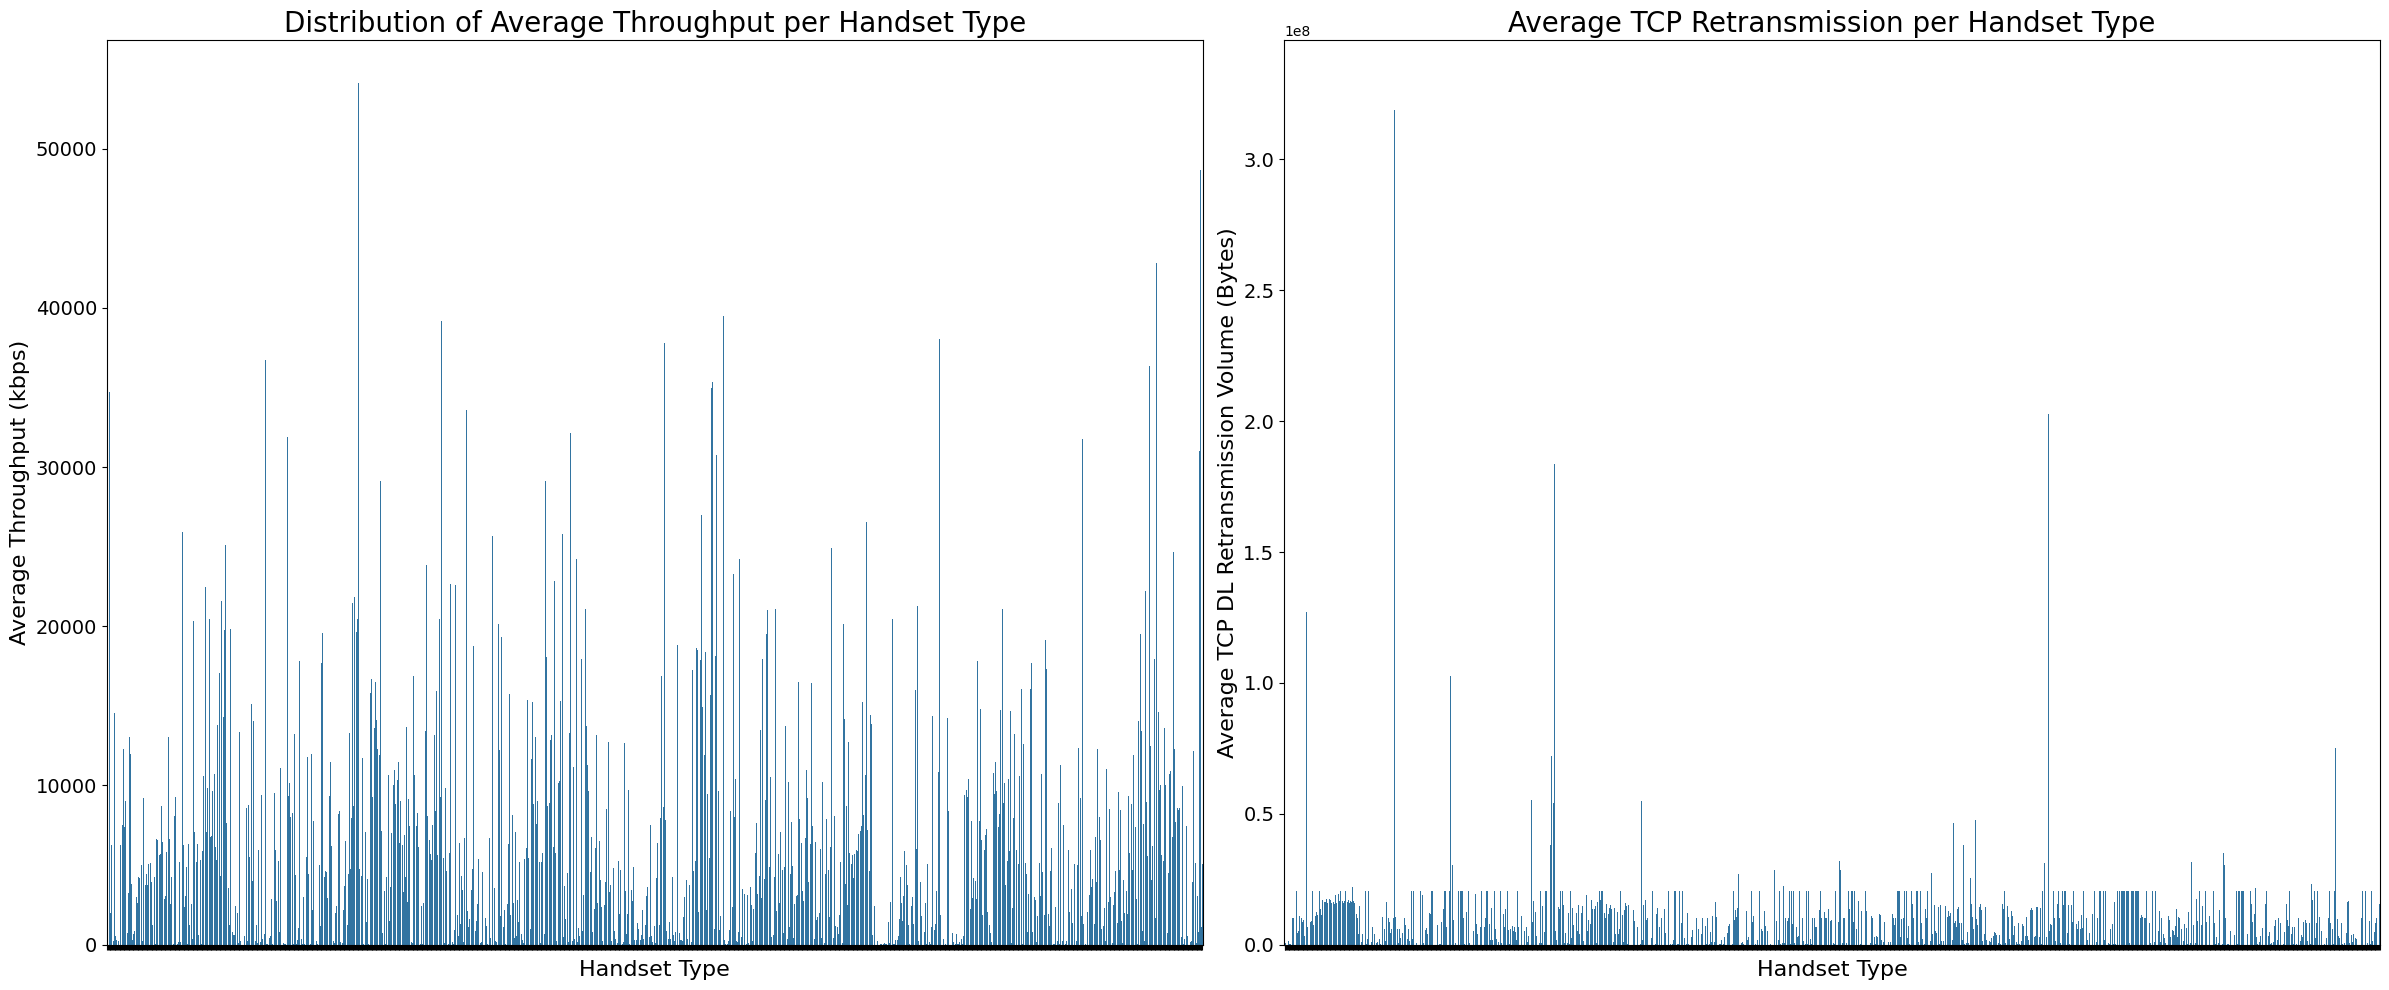

In [66]:
# Calculate average RTT and average throughput
df['Avg RTT'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2
df['Avg Throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2

# Aggregate information per handset type
handset_agg = df.groupby('Handset Type').agg({
    'Avg Throughput': 'mean',
    'TCP DL Retrans. Vol (Bytes)': 'mean'
}).reset_index()

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Plotting the distribution of average throughput per handset type
sns.barplot(x='Handset Type', y='Avg Throughput', data=handset_agg, ax=ax1)
ax1.set_title('Distribution of Average Throughput per Handset Type', fontsize=20)
ax1.set_xlabel('Handset Type', fontsize=16)  # Add x-axis label
ax1.set_ylabel('Average Throughput (kbps)', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_xticklabels([])  # Remove x-axis tick labels

# Plotting the average TCP retransmission per handset type
sns.barplot(x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', data=handset_agg, ax=ax2)
ax2.set_title('Average TCP Retransmission per Handset Type', fontsize=20)
ax2.set_xlabel('Handset Type', fontsize=16)  # Add x-axis label
ax2.set_ylabel('Average TCP DL Retransmission Volume (Bytes)', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_xticklabels([])  # Remove x-axis tick labels

plt.subplots_adjust(wspace=0.4)  # Adjust the space between the two plots
plt.tight_layout()
plt.show()

Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster.

C:\Users\Abeni\AppData\Local\Temp\ipykernel_11836\869772219.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Avg Throughput (MB)', data=cluster_agg_throughput, palette='viridis', ax=ax1)
C:\Users\Abeni\AppData\Local\Temp\ipykernel_11836\869772219.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Avg TCP Retrans (MB)', data=cluster_agg_tcp_retrans, palette='viridis', ax=ax2)


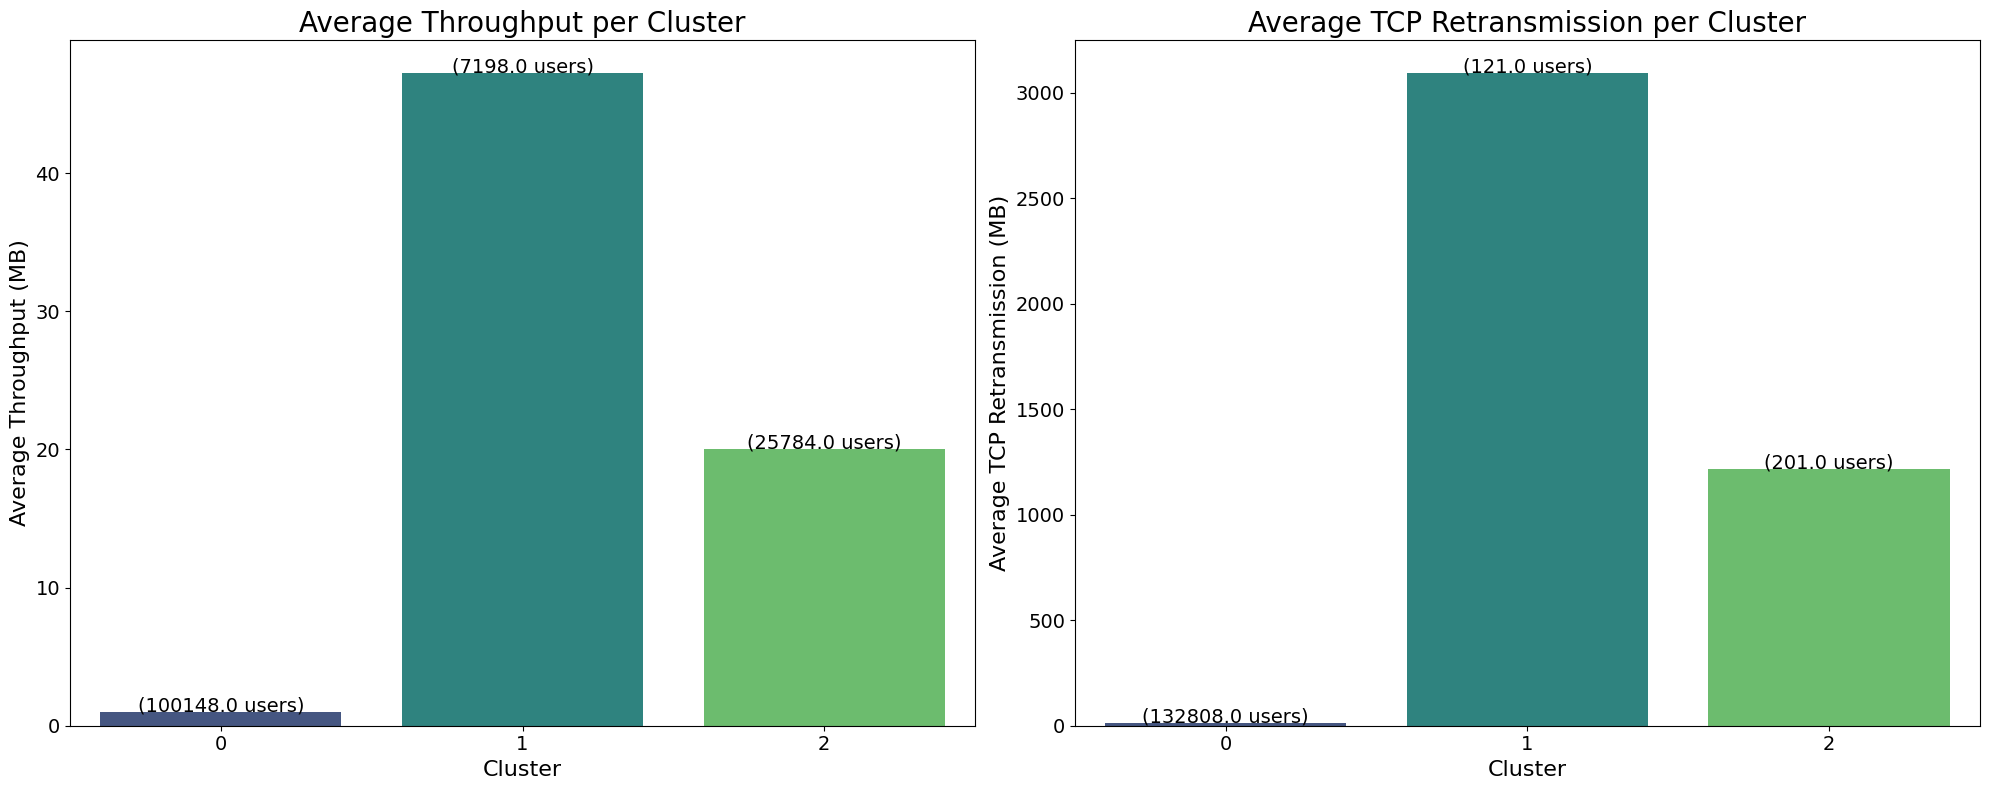

In [60]:
# Calculate average throughput
df['Avg Throughput (kbps)'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2
df['Avg Throughput (MB)'] = df['Avg Throughput (kbps)'] / 1024

# Calculate average TCP retransmission
df['Avg TCP Retrans'] = df['TCP DL Retrans. Vol (Bytes)']
df['Avg TCP Retrans (MB)'] = df['Avg TCP Retrans'] / (1024 ** 2)

# Perform k-means clustering for throughput
features_throughput = df[['Avg Throughput (MB)']]
kmeans_throughput = KMeans(n_clusters=3, random_state=42)
df['Cluster_Throughput'] = kmeans_throughput.fit_predict(features_throughput)

# Perform k-means clustering for TCP retransmission
features_tcp_retrans = df[['Avg TCP Retrans (MB)']]
kmeans_tcp_retrans = KMeans(n_clusters=3, random_state=42)
df['Cluster_TCP_Retrans'] = kmeans_tcp_retrans.fit_predict(features_tcp_retrans)

# Aggregate information per cluster for throughput
cluster_agg_throughput = pd.DataFrame({
    'Cluster': [0, 1, 2],
    'Avg Throughput (MB)': [1021.05 / 1024, 48382.88 / 1024, 20546.31 / 1024],
    'Frequency': df['Cluster_Throughput'].value_counts().sort_index().values
})

# Aggregate information per cluster for TCP retransmission
cluster_agg_tcp_retrans = pd.DataFrame({
    'Cluster': [0, 1, 2],
    'Avg TCP Retrans (MB)': [1.550160e+07 / (1024 ** 2), 3.243146e+09 / (1024 ** 2), 1.275973e+09 / (1024 ** 2)],
    'Frequency': df['Cluster_TCP_Retrans'].value_counts().sort_index().values
})

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the average throughput per cluster
sns.barplot(x='Cluster', y='Avg Throughput (MB)', data=cluster_agg_throughput, palette='viridis', ax=ax1)
ax1.set_title('Average Throughput per Cluster', fontsize=20)
ax1.set_xlabel('Cluster', fontsize=16)
ax1.set_ylabel('Average Throughput (MB)', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)
for index, row in cluster_agg_throughput.iterrows():
    ax1.text(row.name, row['Avg Throughput (MB)'], f"({row['Frequency']} users)", color='black', ha="center", fontsize=14)

# Plotting the average TCP retransmission per cluster
sns.barplot(x='Cluster', y='Avg TCP Retrans (MB)', data=cluster_agg_tcp_retrans, palette='viridis', ax=ax2)
ax2.set_title('Average TCP Retransmission per Cluster', fontsize=20)
ax2.set_xlabel('Cluster', fontsize=16)
ax2.set_ylabel('Average TCP Retransmission (MB)', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)
for index, row in cluster_agg_tcp_retrans.iterrows():
    ax2.text(row.name, row['Avg TCP Retrans (MB)'], f"({row['Frequency']} users)", color='black', ha="center", fontsize=14)

plt.tight_layout()
plt.show()

Interpretation of Average Throughput per Cluster and Frequency

Cluster 0:

Average Throughput: Approximately 0.997 MB.

Frequency: 100,148 users.

Interpretation: This cluster represents users with the lowest average throughput. The large number of users in this cluster suggests that a significant portion of the user base experiences relatively low network performance and user experience.

Cluster 1:

Average Throughput: Approximately 47.25 MB.

Frequency: 7,198 users.

Interpretation: This cluster represents users with the highest average throughput. Although the number of users in this cluster is relatively small, they enjoy the best network performance and user experience.

Cluster 2:

Average Throughput: Approximately 20.06 MB.

Frequency: 25,784 users.

Interpretation: This cluster represents users with a moderate average throughput. A considerable number of users fall into this cluster, indicating that many users experience an average level of network performance and user experience.

Interpretation of Average TCP Retransmission per Cluster and Frequency
Cluster 0:

Average TCP Retransmission: Approximately 14.78 MB.

Frequency: 132,808 users.

Interpretation: This cluster represents users with the lowest average TCP retransmission. The large number of users in this cluster suggests that a significant portion of the user base experiences relatively low network issues and better user experience.

Cluster 1:

Average TCP Retransmission: Approximately 3,092.91 MB.

Frequency: 121 users.

Interpretation: This cluster represents users with the highest average TCP retransmission. Although the number of users in this cluster is very small, they experience the poorest network performance and user experience due to high retransmission rates.

Cluster 2:

Average TCP Retransmission: Approximately 1,216.86 MB.

Frequency: 201 users.

Interpretation: This cluster represents users with a moderate average TCP retransmission. The number of users in this cluster is also small, indicating that these users experience an average level of network performance and user experience.


In summary, the majority of users (100,148) experience low average throughput (0.997 MB) and low average TCP retransmission (14.78 MB), indicating average to low network performance. A small group (7,198) enjoys the best network performance with high average throughput (47.25 MB) and low TCP retransmission. Another group (25,784) has moderate average throughput (20.06 MB) and moderate TCP retransmission (1,216.86 MB). A very small group (121) faces the poorest network performance with high TCP retransmission (3,092.91 MB) and moderate average throughput. Overall, most users fall into clusters with lower average throughput and lower average TCP retransmission.